In [129]:
# Importing required Libraries.

import pandas as pd 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [130]:
# Import Data Set.

import io
%cd "C:\Users\Hp\Desktop\Data Science and Analytics\Data Science Projects\Walmart Analysis\Data-Science-with-Python-Walmart-Stores-Sales-Prediction-Project-main"


C:\Users\Hp\Desktop\Data Science and Analytics\Data Science Projects\Walmart Analysis\Data-Science-with-Python-Walmart-Stores-Sales-Prediction-Project-main


In [131]:
# Read the CSV file.

boschsales=pd.read_csv("Bosch_Store_sales.csv")

In [132]:
# Understand dataset.

boschsales.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [133]:
# Basic information about our dataset.

boschsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [134]:
#Maximum value in each column.

boschsales.max()

Store                   45
Date            31-12-2010
Weekly_Sales    3818686.45
Holiday_Flag             1
Temperature         100.14
Fuel_Price           4.468
CPI             227.232807
Unemployment        14.313
dtype: object

In [135]:
boschsales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [136]:
# store having maximum weekly sales.

sales_list= pd.DataFrame(boschsales.groupby(['Store'])['Weekly_Sales'].sum())
sales_list.reset_index()
max_sales=sales_list.loc[sales_list['Weekly_Sales'] ==  sales_list['Weekly_Sales'].max()]
max_sales

# We can see that store 20 has maximum weekly sales.

,Weekly_Sales
Store,
20,3.013978e+08


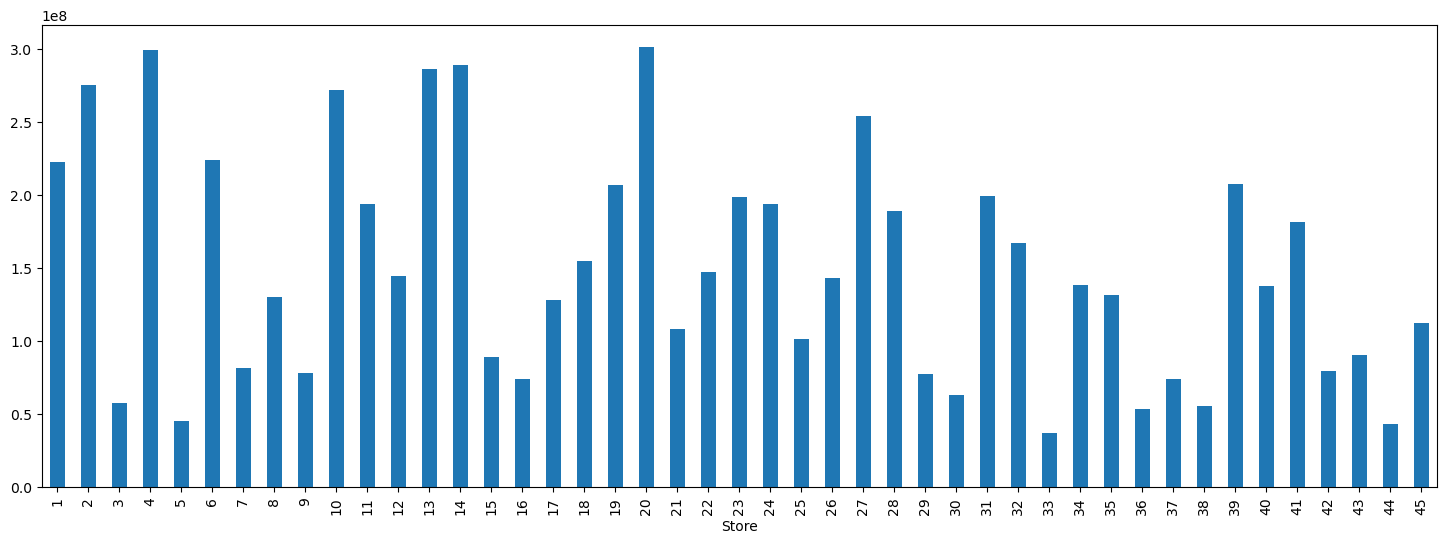

In [137]:
# Plot showing weekly sales against stores.

plt.figure(figsize=(18,6))
boschsales.groupby(['Store'])['Weekly_Sales'].sum().plot(kind='bar')
plt.show()

In [138]:
# store having maximum standard deviation i.e., the sales vary a lot. Also, finding out the coefficient of variance (C0V)

maxstd=pd.DataFrame(boschsales.groupby('Store').agg({'Weekly_Sales':['std','mean','var']}))
maxstd = maxstd.reset_index()

maxstd['CoV'] =(maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')]) *100

# Finding the store with maximum standard deviation.

maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

# store with maximum standard deviation of 317569.949476 is 14.

Store   Weekly_Sales                                    CoV
                    std          mean           var           
13    14  317569.949476  2.020978e+06  1.008507e+11  15.713674

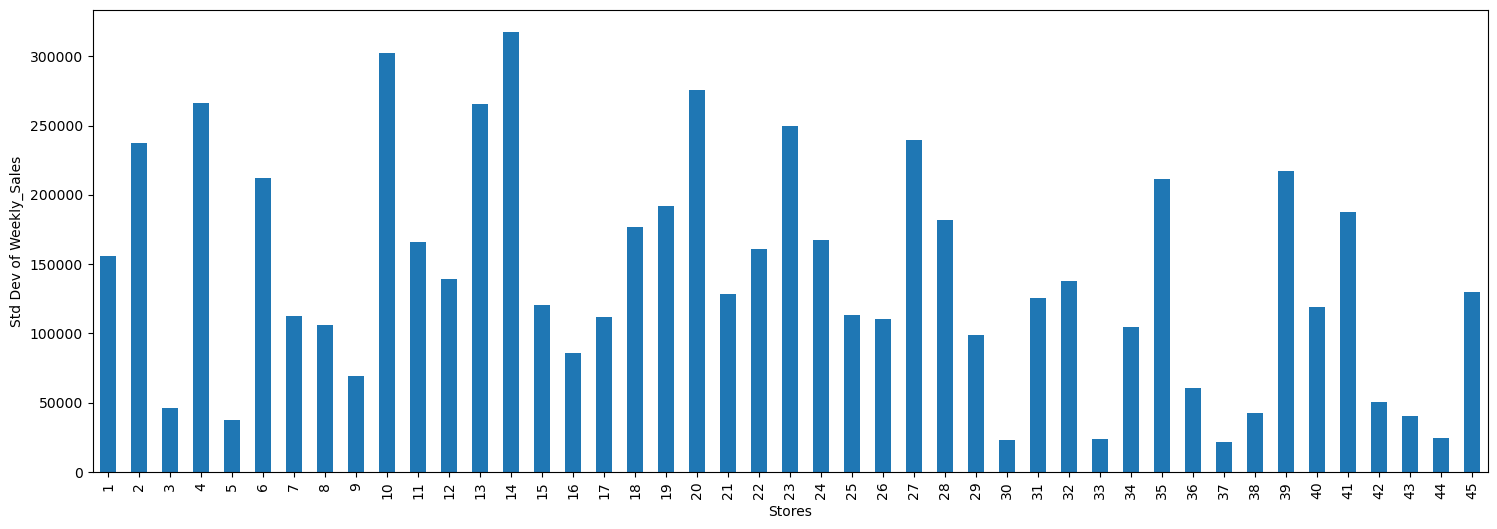

In [139]:
# Bar plot showing "Std Dev of Weekly_Sales" agianst "Stores"

plt.figure(figsize=(18,6))
boschsales.Weekly_Sales.groupby(boschsales.Store).std().plot(kind='bar') 
plt.xlabel("Stores")
plt.ylabel("Std Dev of Weekly_Sales")
plt.show()


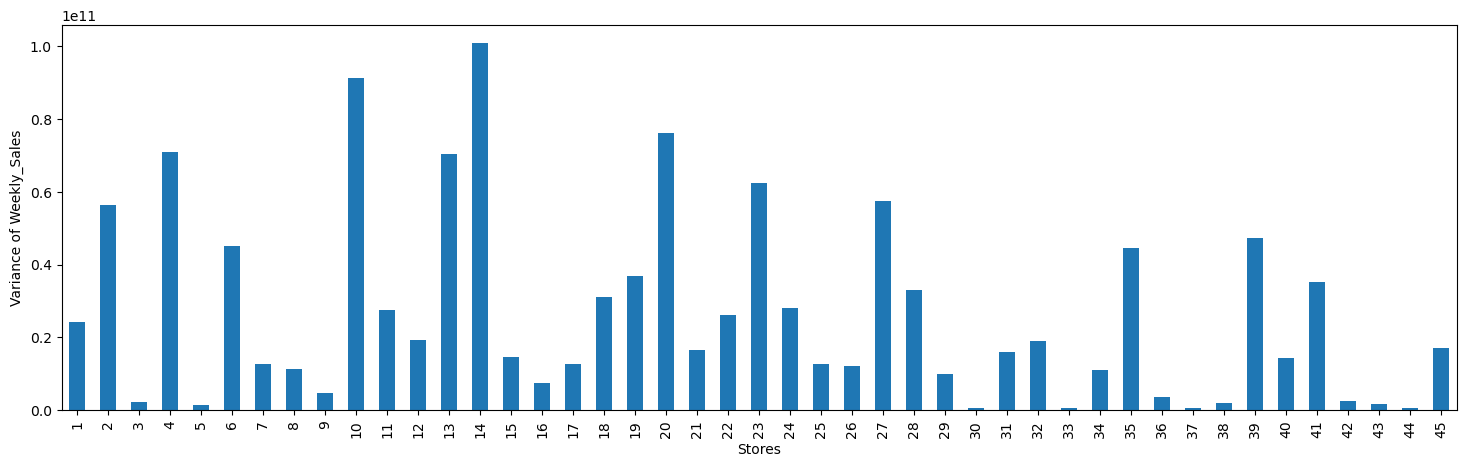

In [140]:
# Bar plot showing "var" agianst "Stores"

plt.figure(figsize=(18,5))
boschsales.Weekly_Sales.groupby(boschsales.Store).var().plot(kind='bar') 
plt.xlabel("Stores")
plt.ylabel("Variance of Weekly_Sales")
plt.show()

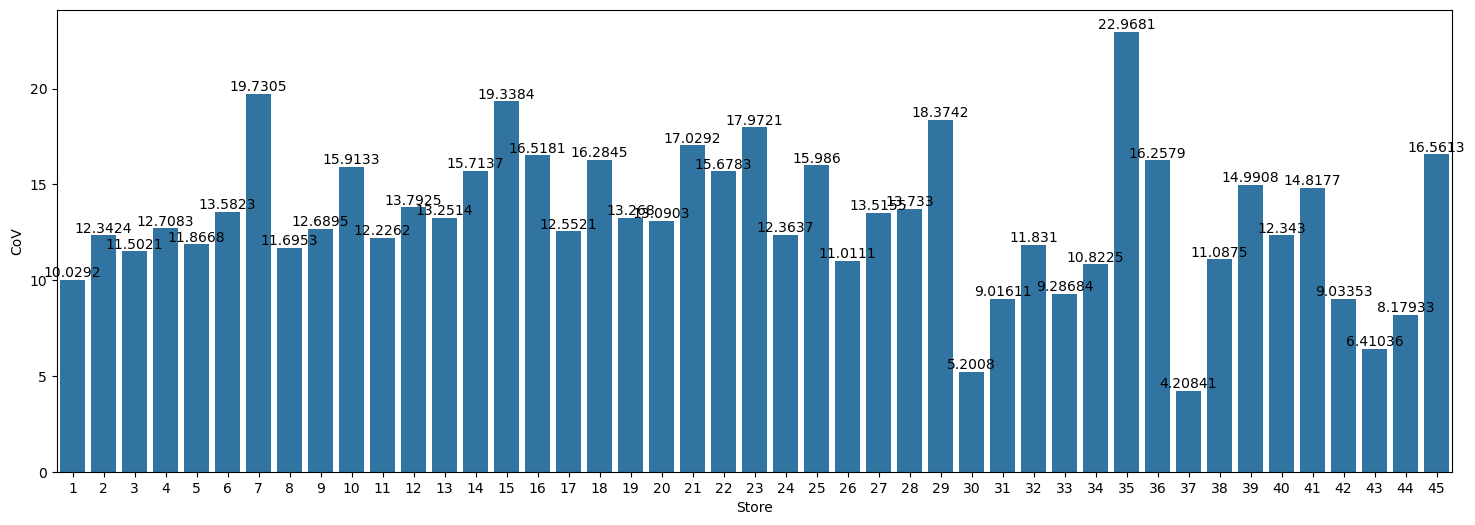

In [141]:
# Coefficient of mean to standard deviation

# Bar plot showing "CoV" agianst "Stores"

plt.figure(figsize=(18,6))
storeax=sns.barplot(x='Store',y='CoV',data=maxstd)
storeax.bar_label(storeax.containers[0]);
plt.show()

# Store/s having good quarterly growth rate in Q3’2012.

In [142]:
# Extracting Year, Month and Week from date column

boschsales['Date'] = pd.to_datetime(boschsales.Date,format='%d-%m-%Y')

boschsales['Year'], boschsales['Month'], boschsales['Week'] = boschsales['Date'].dt.year, boschsales['Date'].dt.month, boschsales['Date'].dt.isocalendar().week
boschsales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42


In [143]:
# Defining the start and end date of Q3 and Q2 ( Recent 2 quarters) 

Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))

Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))

# Collecting the data of Q3 and Q2 from original dataset.

Q3data=boschsales[(boschsales['Date'] >= Q3_date_from) & (boschsales['Date'] <= Q3_date_to)]
Q2data=boschsales[(boschsales['Date'] >= Q2_date_from) & (boschsales['Date'] <= Q2_date_to)]

In [144]:
# Finding the sum weekly sales of each store in Q3

Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)

# Finding the sum weekly sales of each store in Q2

Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)

# Mergeing Q2 and Q3 data on Store as a common column

Q3_Growth= Q2.merge(Q3,how='inner',on='Store')

In [145]:
Q3_Growth.head(3)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales
0,1,20978760.12,20253947.78
1,2,25083604.88,24303354.86
2,3,5620316.49,5298005.47


In [146]:
# Calculating Growth rate of each Store and collecting it into a dataframe

# Growth rate = ((Present value — Past value )/Past value )*100

Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.head()

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
0,1,20978760.12,20253947.78,-0.03
1,2,25083604.88,24303354.86,-0.03
2,3,5620316.49,5298005.47,-0.06
3,4,28454363.67,27796792.46,-0.02
4,5,4466363.69,4163790.99,-0.07


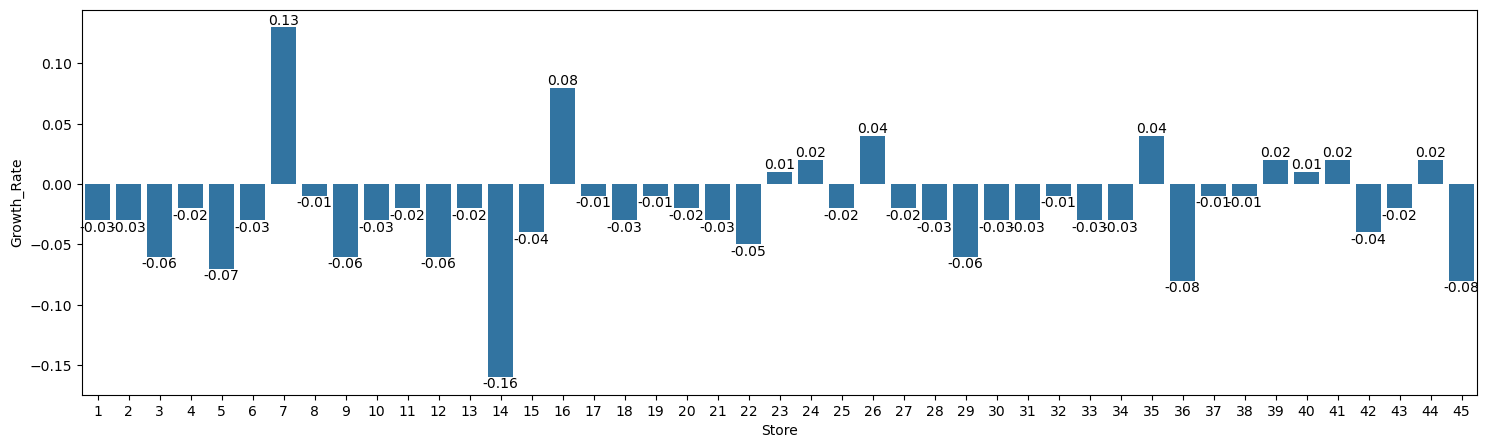

In [147]:
# Bar plot showing "Growth_Rate" agianst "Stores"

plt.figure(figsize=(18,5))
storebx=sns.barplot(x='Store',y='Growth_Rate',data=Q3_Growth)
storebx.bar_label(storebx.containers[0]);
plt.show()

In [148]:
# Finding the store with highest Growth_Rate.

Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)

# Store 7 has made the highest growth.

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
6,7,7290859.27,8262787.39,0.13


In [149]:
# Finding the store with lowest Growth_Rate.

Q3_Growth.sort_values('Growth_Rate',ascending=True).head(1)

# Store 14 has made the lowest growth.

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,25155535.41,21187560.65,-0.16


In [150]:
# Finding the mean sales of non holiday and holiday.

boschsales.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

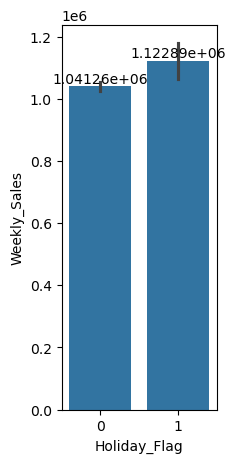

In [151]:
# Bar plot showing "Weekly_Sales" agianst "Holiday_Flag"

plt.figure(figsize=(2,5))
storecx=sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=boschsales)
storecx.bar_label(storecx.containers[0]);
plt.show()

In [152]:
# Marking the holiday dates.

Christmas1 = pd.Timestamp(date(2010,12,31))
Christmas2 = pd.Timestamp(date(2011,12,30))
Christmas3 = pd.Timestamp(date(2012,12,28))
Christmas4 = pd.Timestamp(date(2013,12,27))

Thanksgiving1=pd.Timestamp(date(2010,11,26))
Thanksgiving2=pd.Timestamp(date(2011,11,25))
Thanksgiving3=pd.Timestamp(date(2012,11,23))
Thanksgiving4=pd.Timestamp(date(2013,11,29))

LabourDay1=pd.Timestamp(date(2010,9,10))
LabourDay2=pd.Timestamp(date(2011,9,9))
LabourDay3=pd.Timestamp(date(2012,9,7))
LabourDay4=pd.Timestamp(date(2013,9,6))

SuperBowl1=pd.Timestamp(date(2010,2,12))
SuperBowl2=pd.Timestamp(date(2011,2,11))
SuperBowl3=pd.Timestamp(date(2012,2,10))
SuperBowl4=pd.Timestamp(date(2013,2,8))

In [153]:
# Calculating the mean sales during the holidays.

Christmas_mean_sales=boschsales[(boschsales['Date'] == Christmas1) | (boschsales['Date'] == Christmas2) | (boschsales['Date'] == Christmas3) | (boschsales['Date'] == Christmas4)]
Thanksgiving_mean_sales=boschsales[(boschsales['Date'] == Thanksgiving1) | (boschsales['Date'] == Thanksgiving2) | (boschsales['Date'] == Thanksgiving3) | (boschsales['Date'] == Thanksgiving4)]
LabourDay_mean_sales=boschsales[(boschsales['Date'] == LabourDay1) | (boschsales['Date'] == LabourDay2) | (boschsales['Date'] == LabourDay3) | (boschsales['Date'] == LabourDay4)]
SuperBowl_mean_sales=boschsales[(boschsales['Date'] == SuperBowl1) | (boschsales['Date'] == SuperBowl2) | (boschsales['Date'] == SuperBowl3) | (boschsales['Date'] == SuperBowl4)]


In [154]:
dict_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : boschsales[boschsales['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}

dict_of_mean_sales # List of mean sales during the holidays and mean sales during the Non holidays.

# We can see that during Thanksgiving, mean sales are high than the mean sales during Non holidays.

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1042427.29,
 'SuperBowl_mean_sales': 1079127.99,
 'Non holiday weekly sales': 1041256.3802088555}

In [155]:
mean_sales_during_holidays_Nonholidays=pd.DataFrame(list(dict_of_mean_sales.items()),columns = ['holidays','mean_sales'])

In [156]:
mean_sales_during_holidays_Nonholidays

,holidays,mean_sales
0,Christmas_mean_sales,9.608331e+05
1,Thanksgiving_mean_sales,1.471273e+06
2,LabourDay_mean_sales,1.042427e+06
3,SuperBowl_mean_sales,1.079128e+06
4,Non holiday weekly sales,1.041256e+06


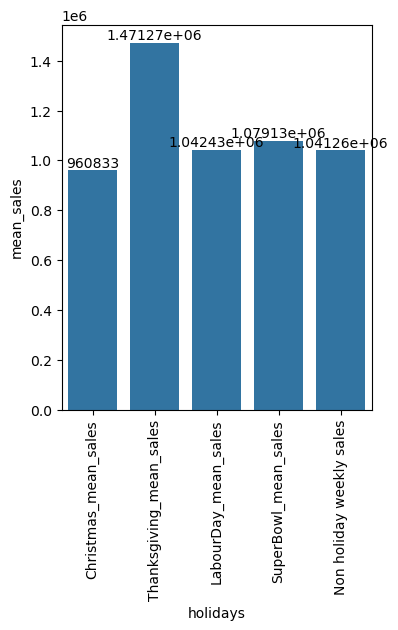

In [157]:
# Bar plot showing mean sales during Holidays and Non Holidays.

plt.figure(figsize=(4,5))
storedx=sns.barplot(x='holidays',y='mean_sales',data=mean_sales_during_holidays_Nonholidays)
plt.xticks(rotation=90)
storedx.bar_label(storedx.containers[0]);
plt.show()

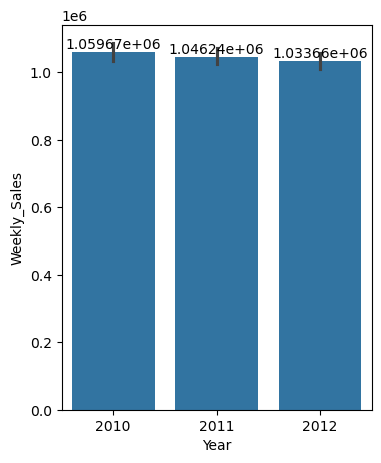

In [158]:
plt.figure(figsize=(4,5))
store_ex=sns.barplot(x='Year', y='Weekly_Sales', data=boschsales); # Year wise average Weekly_Sales
store_ex.bar_label(store_ex.containers[0]);
plt.show()

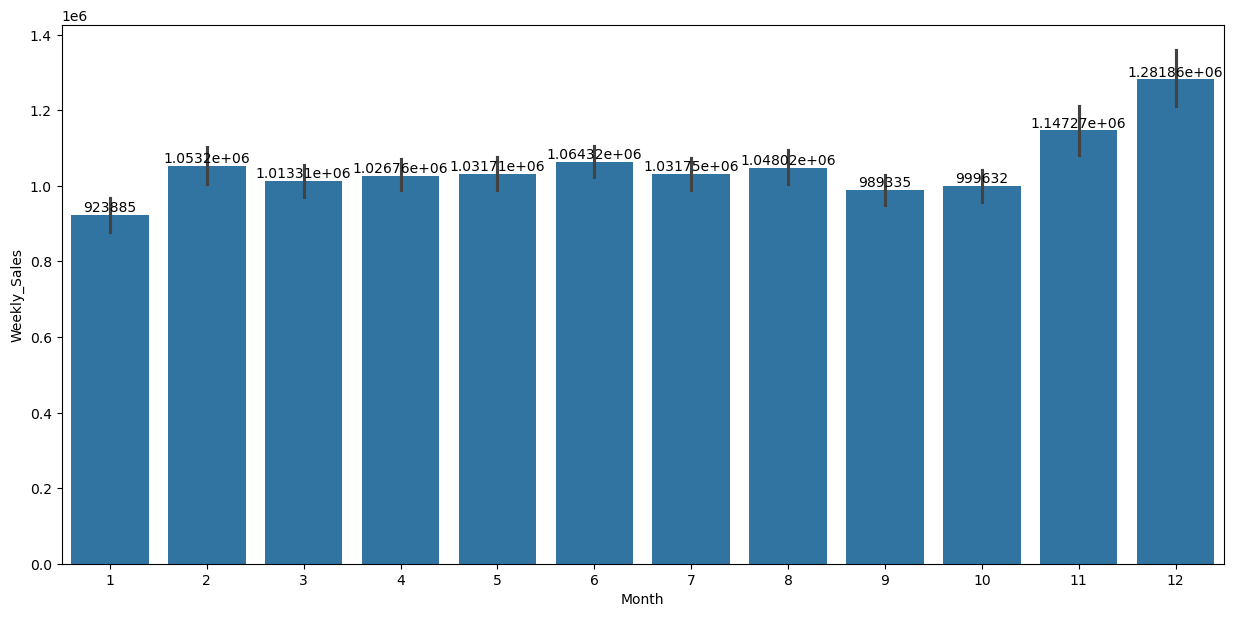

In [159]:
plt.figure(figsize=(15,7))
storefx=sns.barplot(x='Month', y='Weekly_Sales', data=boschsales); # Month wise average Weekly_Sales
storefx.bar_label(storefx.containers[0]);
plt.show()

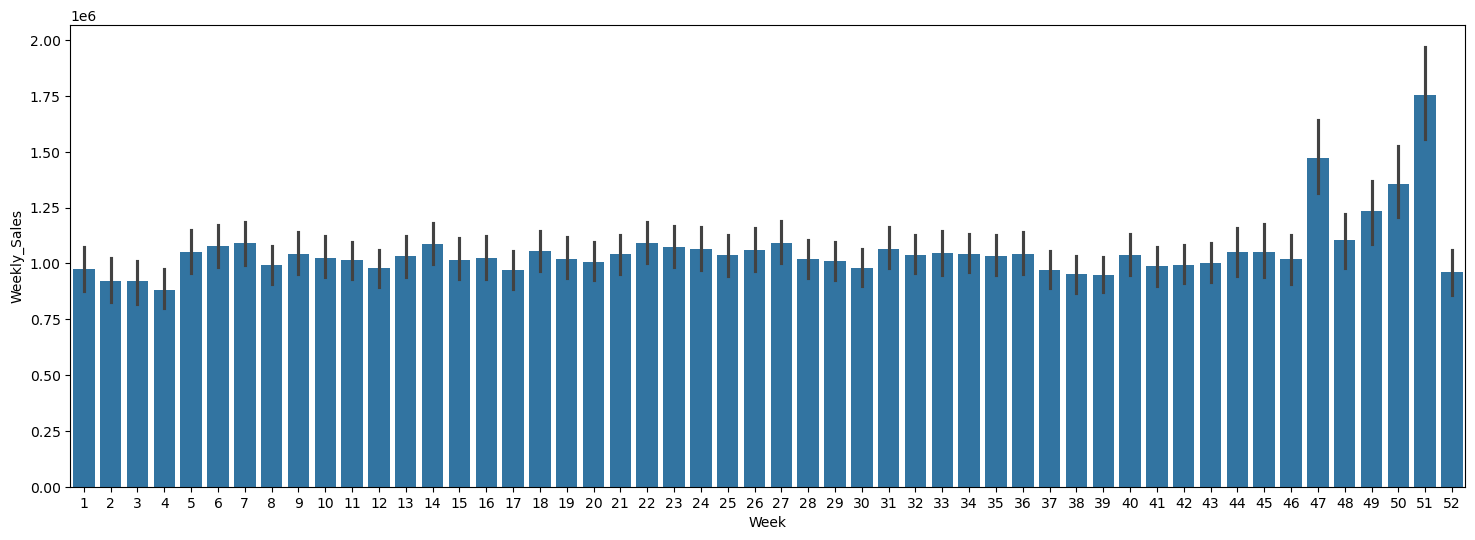

In [160]:
plt.figure(figsize=(18,6))
sns.barplot(x='Week', y='Weekly_Sales', data=boschsales); # Week wise average Weekly_Sales
plt.show()

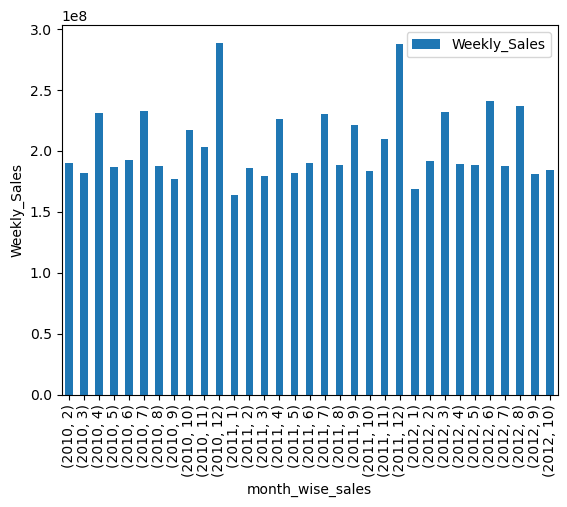

In [161]:
# Monthly sales.

Monthly_sales = boschsales.groupby(['Year','Month']) \
.agg(Weekly_Sales = ('Weekly_Sales', 'sum')).plot(kind='bar')

plt.xlabel("month_wise_sales")
plt.ylabel("Weekly_Sales")
plt.show()

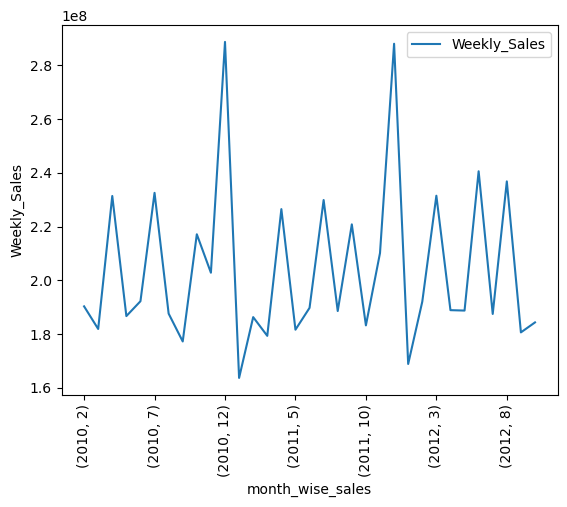

In [162]:
# Monthly sales.

Monthly_sales = boschsales.groupby(['Year','Month']) \
.agg(Weekly_Sales = ('Weekly_Sales', 'sum')).plot(kind='line')

plt.xlabel("month_wise_sales")
plt.xticks(rotation=90)
plt.ylabel("Weekly_Sales")
plt.show()

# We can observe from the Monthly Sales Graph that highest sum of sales is recorded in end of Dec-2010.

In [163]:
# using the to_period function
#boschsales['quarter'] = boschsales['Date'].dt.to_period('Q')
boschsales['quarter'] = boschsales['Date'].dt.quarter

In [164]:
boschsales.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1


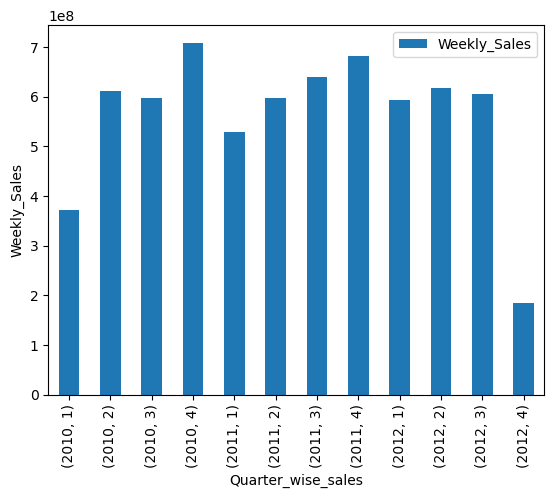

In [165]:
# Quarterly sales.

Quarter_sales = boschsales.groupby(['Year','quarter']) \
.agg(Weekly_Sales = ('Weekly_Sales', 'sum')).plot(kind='bar')

plt.xlabel("Quarter_wise_sales")
plt.xticks(rotation=90)
plt.ylabel("Weekly_Sales")
plt.show()

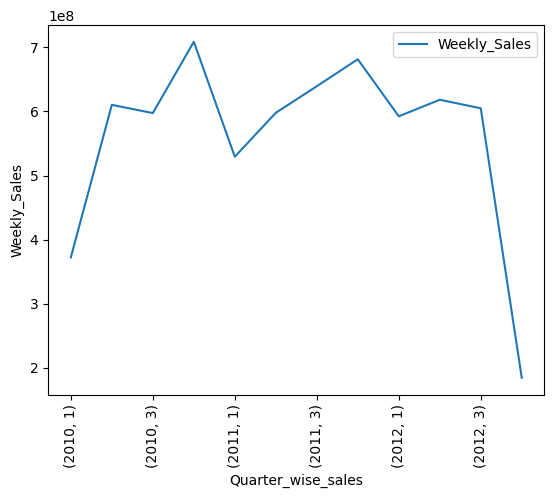

In [166]:
# Quarterly sales.

Quarter_sales = boschsales.groupby(['Year','quarter']) \
.agg(Weekly_Sales = ('Weekly_Sales', 'sum')).plot(kind='line')

plt.xlabel("Quarter_wise_sales")
plt.xticks(rotation=90)
plt.ylabel("Weekly_Sales")
plt.show()

# We can observe from the Quarterly Sales Graph that higest sum of sales is recorded in end of Q4'2010.

In [167]:
# using the to_period function
#boschsales['semester']= boschsales.Date.dt.year.astype(str) + 'S'+ np.where(boschsales.Date.dt.quarter.gt(2),2,1).astype(str)
boschsales['semester']= np.where(boschsales.Date.dt.quarter.gt(2),2,1).astype(str)

In [168]:
boschsales.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,quarter,semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1


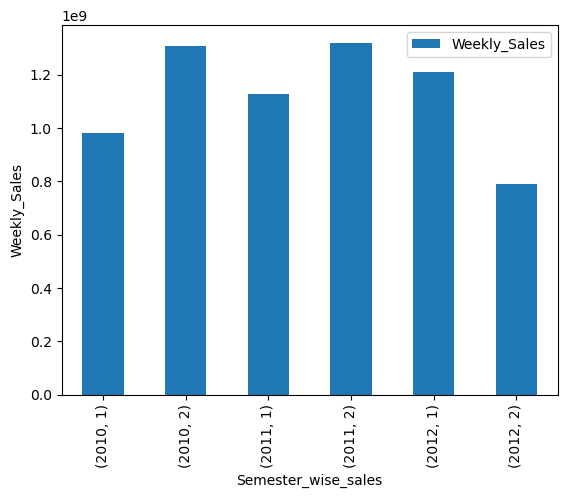

In [169]:
# Semester sales.

Semester_sales = boschsales.groupby(['Year','semester']) \
.agg(Weekly_Sales = ('Weekly_Sales', 'sum')).plot(kind='bar')

plt.xlabel("Semester_wise_sales")
plt.xticks(rotation=90)
plt.ylabel("Weekly_Sales")
plt.show()

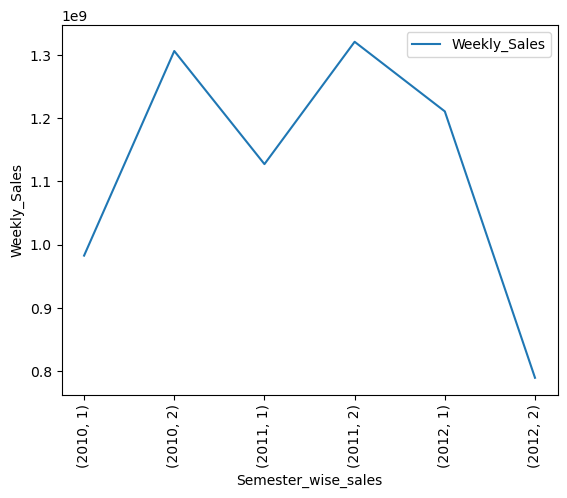

In [170]:
# Semester sales.

Semester_sales = boschsales.groupby(['Year','semester']) \
.agg(Weekly_Sales = ('Weekly_Sales', 'sum')).plot(kind='line')

plt.xlabel("Semester_wise_sales")
plt.xticks(rotation=90)
plt.ylabel("Weekly_Sales")
plt.show()

# We can Observe from Semester graph that at end of 2nd sem of 2011 sales are Highest.

In [171]:
boschsales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,quarter,semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1


# Hypothesis of Factors like CPI, Unemployment and Fuel_price on Weekly_Sales, Creating a Day Column.

# Statistical Modelling For Store 1

In [172]:
# Group the DataFrame by 'Store' and select specific columns
hypothesis = boschsales.groupby('Store')[['Fuel_Price', 'Unemployment', 'CPI', 'Weekly_Sales', 'Holiday_Flag']]
hypothesis.head()

,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag
0,2.572,8.106,211.096358,1643690.90,0
1,2.548,8.106,211.242170,1641957.44,1
2,2.514,8.106,211.289143,1611968.17,0
3,2.561,8.106,211.319643,1409727.59,0
4,2.625,8.106,211.350143,1554806.68,0
...,...,...,...,...,...
6292,2.784,8.992,181.871190,890689.51,0
6293,2.773,8.992,181.982317,656988.64,1
6294,2.745,8.992,182.034782,841264.04,0
6295,2.754,8.992,182.077469,741891.65,0


In [173]:
# Group the DataFrame by 'Store' and select specific columns
hypothesis = boschsales.groupby('Store')[['Fuel_Price', 'Unemployment', 'CPI', 'Weekly_Sales', 'Holiday_Flag']]

# Get the group for Store 1 and ensure it is a copy (not a view)
factors = hypothesis.get_group(1).copy()

# Create the 'day_arr' list with the starting day as 1
day_arr = [1]
for i in range(1, len(factors)):
    day_arr.append(i * 7)

# Now modify the 'Day' column safely using .loc[]
factors.loc[:, 'Day'] = day_arr.copy()

In [174]:
factors.head()

,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Day
0,2.572,8.106,211.096358,1643690.90,0,1
1,2.548,8.106,211.242170,1641957.44,1,7
2,2.514,8.106,211.289143,1611968.17,0,14
3,2.561,8.106,211.319643,1409727.59,0,21
4,2.625,8.106,211.350143,1554806.68,0,28


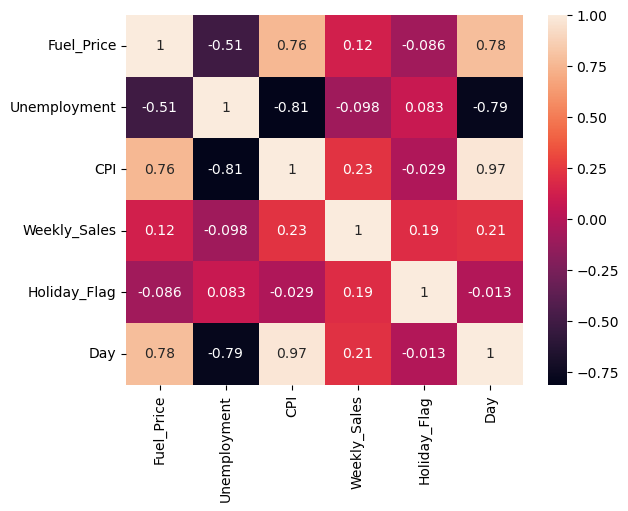

In [175]:
sns.heatmap(factors.corr(), annot = True)
plt.show()

In [176]:
# By looking at the heatmap we can conclude that CPI and Holiday_Flag is fairly strongly correlated to Weekly_Sales.

# Hypothesis of CPI, FuelPrice, Unemployment with Weekly_Sales.

In [177]:
# Hypothesis Testing - CPI

from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])

print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.106725927640744e-144
reject null hypothesis


In [178]:
# Hypothesis Testing - Fuel_Price

ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])

print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.050079726743709e-144
reject null hypothesis


In [179]:
# Hypothesis Testing - Uneployment

ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])

print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.0515405336011733e-144
reject null hypothesis


In [180]:
# Hypothesis Testing - Uneployment

ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Holiday_Flag'])

print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.049220543209507e-144
reject null hypothesis


# Linear Regression Model

In [181]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [182]:
factors

,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Day
0,2.572,8.106,211.096358,1643690.90,0,1
1,2.548,8.106,211.242170,1641957.44,1,7
2,2.514,8.106,211.289143,1611968.17,0,14
3,2.561,8.106,211.319643,1409727.59,0,21
4,2.625,8.106,211.350143,1554806.68,0,28
...,...,...,...,...,...,...
138,3.666,6.908,222.981658,1437059.26,0,966
139,3.617,6.573,223.181477,1670785.97,0,973
140,3.601,6.573,223.381296,1573072.81,0,980
141,3.594,6.573,223.425723,1508068.77,0,987


In [183]:
boschsales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,quarter,semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39,3,2
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40,4,2
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41,4,2
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42,4,2


In [184]:
# For Store 1

boschsales['Day']=factors['Day']
boschsales_1=boschsales[(boschsales.Store == 1)]
boschsales_1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,quarter,semester,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,1,1,1.0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,1,1,7.0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,1,1,14.0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,1,1,21.0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,1,1,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,39,3,2,966.0
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,2012,10,40,4,2,973.0
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,2012,10,41,4,2,980.0
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,42,4,2,987.0


In [185]:
# Remove extra added columns

boschsales_1 = boschsales_1.drop(['Year','Month','Week','quarter','semester'], axis=1)
boschsales_1.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1.0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,7.0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14.0


In [186]:
# Setup data  
X = boschsales_1.drop(['Weekly_Sales', 'Date'], axis=1)
y = boschsales_1['Weekly_Sales']

## Split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Fitting data to multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [187]:
## Check out the score
regressor.score(X_test, y_test)

0.051433013580196474

In [188]:
X_test

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
57,1,0,53.56,3.459,214.111056,7.742,399.0
64,1,0,72.03,3.810,215.627954,7.682,448.0
98,1,0,47.96,3.112,219.357722,7.866,686.0
21,1,0,80.91,2.669,211.223533,7.787,147.0
81,1,0,87.96,3.523,215.733226,7.962,567.0
31,1,1,78.69,2.565,211.495190,7.787,217.0
85,1,0,75.80,3.467,216.375825,7.962,595.0
36,1,0,67.18,2.720,211.813744,7.838,252.0
41,1,0,51.41,2.771,211.889674,7.838,287.0
120,1,0,77.22,3.561,221.744944,7.143,840.0


In [189]:
# Predict test result
y_pred = regressor.predict(X_test)
y_pred

array([1537030.77549694, 1542313.74108229, 1600504.4168272 ,
       1484449.68714448, 1506869.33257533, 1571809.11025818,
       1528110.97658201, 1494492.47724498, 1507666.7674199 ,
       1588580.83361967, 1491621.87947827, 1605106.75546803,
       1543691.82729157, 1507153.71929303, 1573895.00153055,
       1572351.08992789, 1666951.35128518, 1569776.91859298,
       1503942.15612531, 1499041.16158551, 1489032.99809491,
       1592436.55087211, 1649282.41614805, 1588225.59188751,
       1485542.30433995, 1502761.62125991, 1483010.89160763,
       1477888.90990767, 1537421.69997719])

In [190]:
## Function to check out the accuracy of the model
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    errors = np.abs(y_test - y_pred)
    mape = np.mean(100 * (errors / y_test))
    print('Mean Absolute Percentage Error:', round(mape, 2), '%.')
    accuracy = 100 - mape
    print('Accuracy:', round(accuracy, 2), '%.')

In [191]:
## Check out the accuracy of the model
mean_absolute_percentage_error(y_test, y_pred)

Mean Absolute Percentage Error: 6.95 %.
Accuracy: 93.05 %.


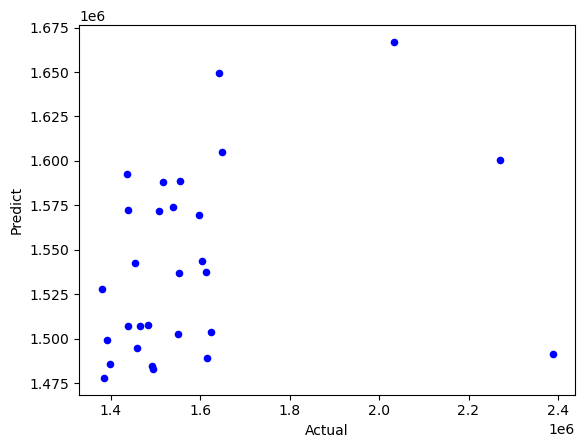

In [192]:
# Plot the Actual vs predicted values
y_test_pred_df = pd.DataFrame(list(zip(y_test, y_pred)), columns =['Actual', 'Predict'])
y_test_pred_df
y_test_pred_df.plot(x="Actual", y="Predict", kind="scatter", color="blue");
plt.show()

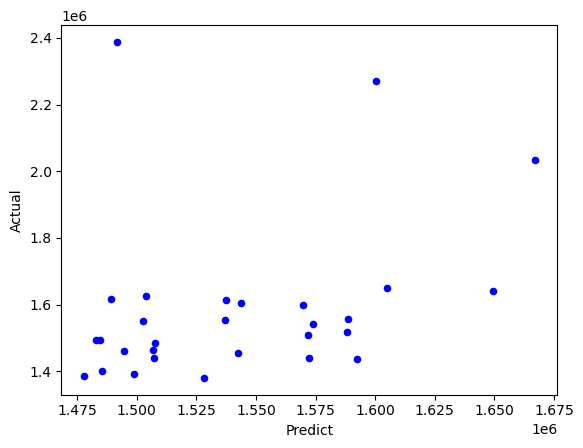

In [193]:
# Plot the predicted vs actual values
y_test_pred_df.plot(x="Predict", y="Actual", kind="scatter", color="blue");
plt.show()

In [194]:
y_test_pred_df

,Actual,Predict
0,1553191.63,1.537031e+06
1,1455090.69,1.542314e+06
2,2270188.99,1.600504e+06
3,1492418.14,1.484450e+06
4,1464693.46,1.506869e+06
5,1507460.69,1.571809e+06
6,1380020.27,1.528111e+06
7,1459409.10,1.494492e+06
8,1483784.18,1.507667e+06
9,1555444.55,1.588581e+06
